# COGS 118A - Final Project

# Economic Correlation with Homicide Rates

## Group members

- Maxwell Jung
- Carter Nielsen
- Yescenia Alvarez

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

The background of this area of investigation is deep, as there are many papers and articles about the possible and very likely link between economy and crime, especially in terms of relating poverty and increasing crime rates <a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Specifically looking at historical data, income and unemployment rate have been found to have a very large impact on crime rate increasing or decreasing, and in this project we hope to see if different measures can be found to have a simialr correlation at the very least. If something of note is found/reinforced from earlier studies, it could be useful to know when to try to have safer environments and try to combat the increases in homicides.

# Problem Statement

The problem being solved here is to potentially find and be able to predict crime with analysis of how the economy is performing. This approach could then be expanded to address more specific communities and predict when crime rate might increase based on the economic performance of local businesses etc.

# Data

Dataset 1: [Dow Stock Data 2000-2020](https://www.kaggle.com/datasets/deeplytics/dow-stock-data)
- 20 years of top 30 companies stock prices, containing date, price, high, low and other information.
- Each observation contains the daily stock info about a company.
- The most important variables for us will be the date and price, as they will be used as the independent variable for our predictor. they will be represented as a date string and as a float value for the price.
- The only thing of note for cleaning is that we will be only using the data from 2000-2014 so that it will match up with our second dataset.

Dataset 2: [Homicide reports](https://www.kaggle.com/datasets/murderaccountability/homicide-reports)
- contains 34 years of homicide reports from cities in the U.S. it contains data about city, agency reported to, type of crime, information about the date, victim, perpetrator among other things.
- Each data point is one reported crime.
- The critical variable for this dataset will be the date.
- For cleaning, we will have to transform the data to be in a time series, so that we can count the amount of crime per day or month as opposed to having a list of each crime.

# Proposed Solution

Our solution to this problem is to find a machine learning model that can predict homicide rates given our economic data, we will try several different forms of models to attain the best accuracy we can.

# Evaluation Metrics

We plan on blocking the data we have from the years 2000-2014 into training and testing blocks, and the metric of evaluation will be the model's performance on the testing data.

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Setup

Include libraries and load datasets

In [1]:
#Data Wrangling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


#homicide_data data
homicide_data = pd.read_csv('deaths_data.csv')

#stock price dataset
dow_data = pd.read_csv('dow_data.csv')

/Users/maxjung/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Stock Price Data Cleaning

In [2]:
# Convert dates to standard datetime objects

#dow_data = dow_data[dow_data['stock'] == 'DOW']
dow_data['date']= pd.to_datetime(dow_data['date']).dt.date

In [3]:
# Exlude datapoints before 2015

dow_data = dow_data[dow_data['date'] < pd.to_datetime('2015-01-01')]

/Users/maxjung/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


# Data Exploration

In [4]:
dow_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106232 entries, 0 to 148991
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   stock      106232 non-null  object 
 1   date       106232 non-null  object 
 2   open       106232 non-null  float64
 3   high       106232 non-null  float64
 4   low        106232 non-null  float64
 5   close      106232 non-null  float64
 6   adj_close  106232 non-null  float64
 7   volume     106232 non-null  int64  
 8   dividend   106232 non-null  float64
 9   split      106232 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 8.9+ MB


In [5]:
# The dataset contains data from 29 different stocks
    
print(dow_data['stock'].unique())
print(len(dow_data['stock'].unique()))

['AAPL' 'AMGN' 'AXP' 'BA' 'CAT' 'CRM' 'CSCO' 'CVX' 'DIS' 'GS' 'HD' 'HON'
 'IBM' 'INTC' 'JNJ' 'JPM' 'KO' 'MCD' 'MMM' 'MRK' 'MSFT' 'NKE' 'PG' 'TRV'
 'UNH' 'V' 'VZ' 'WBA' 'WMT']
29


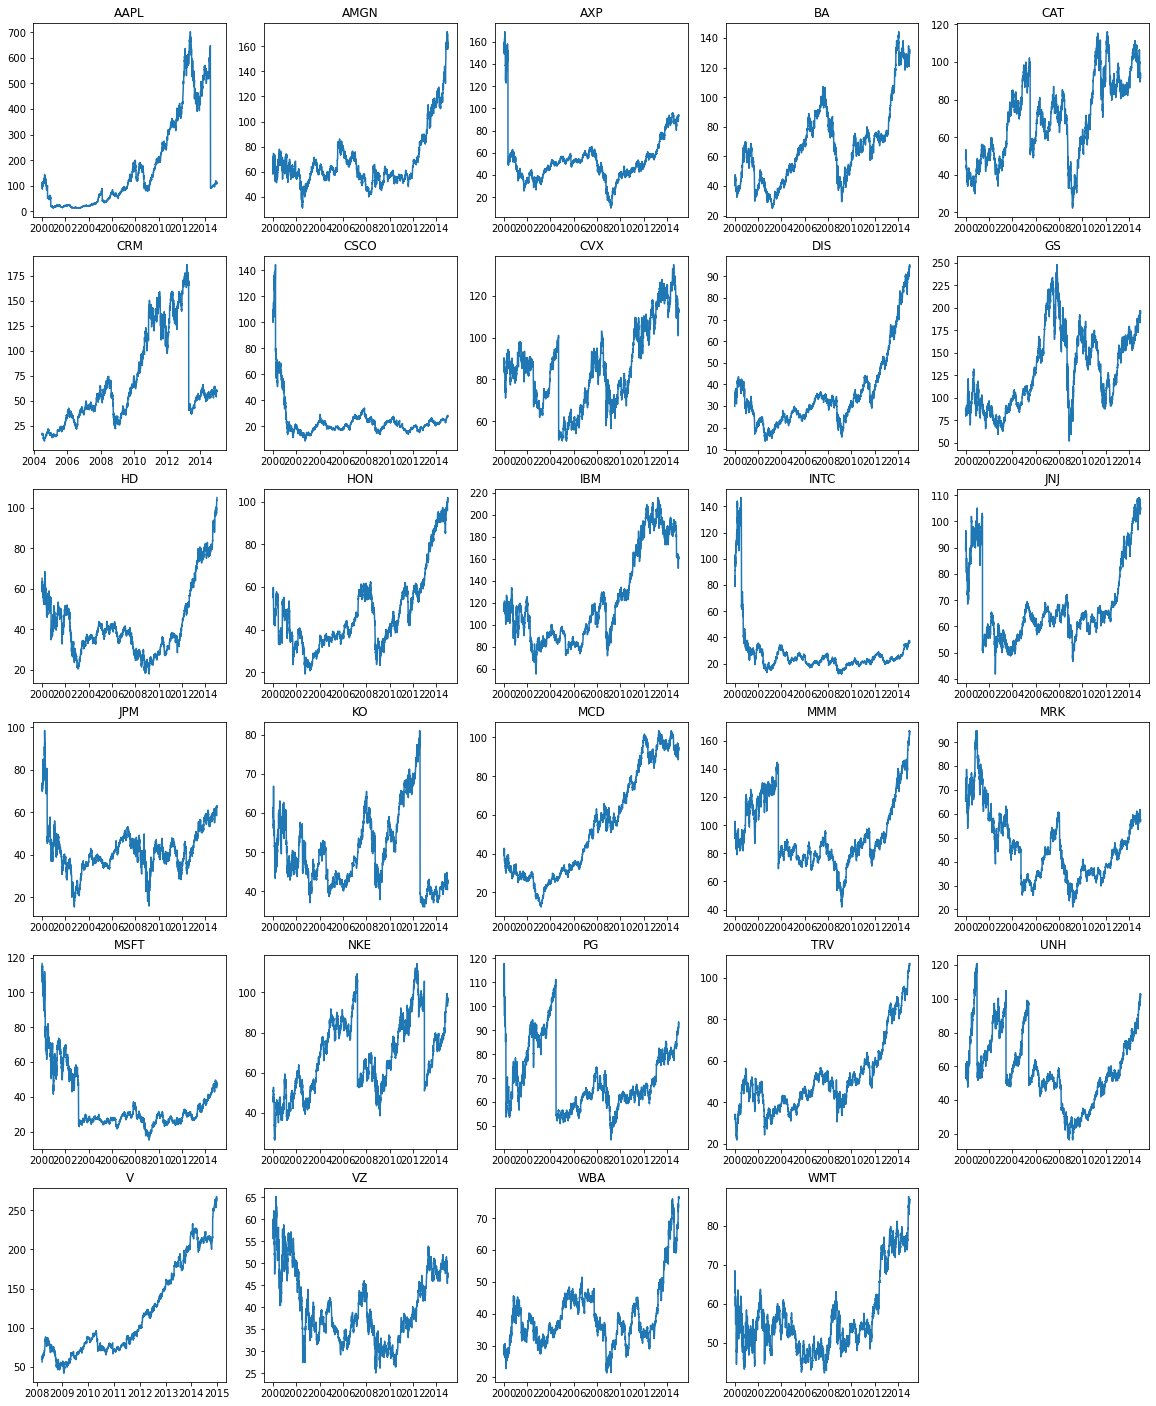

In [6]:
# Plot the stock historical stock prices

i = 1
plt.rcParams['figure.figsize'] = [20, 25]
for stock in dow_data['stock'].unique():
    
    stock_plot = dow_data[dow_data['stock'] == stock]
    plt.subplot(6, 5, i)
    plt.plot(stock_plot['date'], stock_plot['close'])
    plt.title(stock)
    
    i += 1

plt.show()
plt.rcParams['figure.figsize'] = [5, 5]

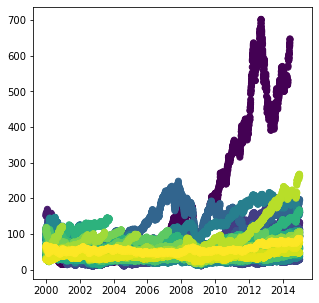

In [7]:
def dfScatter(df, xcol, ycol, catcol):
    fig, ax = plt.subplots()
    categories = np.unique(df[catcol])
    colors = np.linspace(0, 1, len(categories))
    colordict = dict(zip(categories, colors))  

    df["Color"] = df[catcol].apply(lambda x: colordict[x])
    ax.scatter(df[xcol], df[ycol], c=df.Color)


dfScatter(dow_data, 'date', 'close', 'stock')

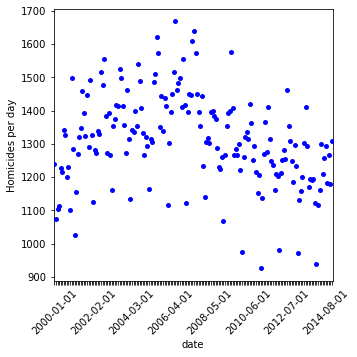

In [8]:
month_map = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}

homicide_data['Month_num'] = homicide_data['Month'].map(month_map)
homicide_data['date'] = homicide_data.apply(lambda row: (str(row['Year']) + '-' + str(row['Month_num']) + '-1'), axis = 1)
homicide_data['date']= pd.to_datetime(homicide_data['date'])


homicide_date_counts = pd.DataFrame(homicide_data['date'].value_counts().rename_axis('date').reset_index(name='homicides'))

homicide_date_counts['date'] = homicide_date_counts['date'].dt.date

homicide_date_counts['month'] = [date.month for date in homicide_date_counts['date']]

homicide_date_counts = homicide_date_counts.sort_values(['date']).reset_index()

ax = sns.swarmplot(x= 'date', y= 'homicides', palette=['blue'], data=homicide_date_counts)
plt.ylabel("Homicides per day")
plt.xticks(rotation = 45)
every_nth = 25
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

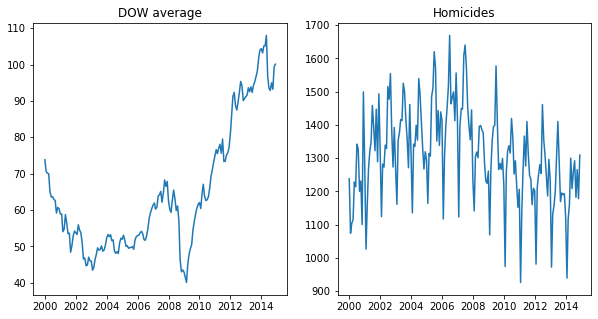

In [9]:
#creating data for average dow price
dow_data['month'] = pd.DatetimeIndex(dow_data['date']).month
dow_data['year'] = pd.DatetimeIndex(dow_data['date']).year
dow_grouped = pd.DataFrame(dow_data.groupby(['year', 'month'])['close'].mean()).reset_index()
dow_grouped['date'] = dow_grouped.apply(lambda row: (str(int(row['year'])) + '-' + str(int(row['month'])) + '-1'), axis = 1)
dow_grouped['date']= pd.to_datetime(dow_grouped['date'])


plt.rcParams['figure.figsize'] = [10, 5]

# Plot the DOW average
plt.subplot(121)
plt.plot(dow_grouped['date'], dow_grouped['close'])
plt.title('DOW average')

# Plot homicide history
plt.subplot(122)
plt.title('Homicides')
plt.plot(homicide_date_counts['date'], homicide_date_counts['homicides'])

plt.show()

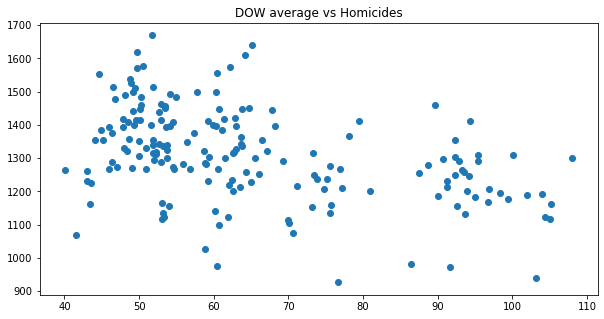

In [10]:
plt.scatter(dow_grouped['close'], homicide_date_counts['homicides'])
plt.title('DOW average vs Homicides')

plt.show()

## First Model - Linear Regression

0.18966901625159482
0.21609854359784386


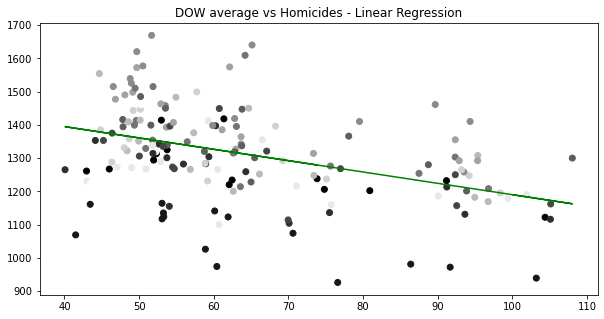

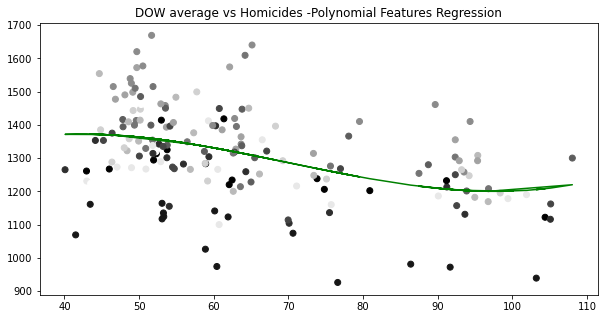

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Feature is daily closing price
X = np.array(dow_grouped['close']).reshape(-1, 1)

# Labels are number of homicides
y = np.array(homicide_date_counts['homicides']).reshape(-1, 1)

# Split the data into training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


reg = LinearRegression().fit(X_train, y_train)


print(reg.score(X_test, y_test))

model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])

model = model.fit(X_train, y_train)
model.named_steps['linear'].coef_
print(model.score(X_test, y_test))

plt.scatter(dow_grouped['close'], homicide_date_counts['homicides'], c=dow_grouped['month'], cmap='gray')
plt.title('DOW average vs Homicides - Linear Regression')
plt.plot(X, reg.predict(X), color = "Green")
plt.show()

plt.scatter(dow_grouped['close'], homicide_date_counts['homicides'], c=dow_grouped['month'], cmap='gray')
plt.title('DOW average vs Homicides -Polynomial Features Regression')
plt.plot(X, model.predict(X), color = "Green")
plt.show()


Obviously not a very good predictor, scoring below .30 for both normal linear regression and polynomial features regression.
We hypothesize that this might be because it has been shown that homicides along with other violent crimes also have high correlation with time of year/seasons as you can see from the greyscale dots, almost all of the darker dots are below the regression line. Next, we can try a similar regression but include date as another explanatory variable to try to reduce the confounding variable. We can also try increasing the number of degrees for our polynomial features model.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Feature is daily closing price and now month
X = np.array(dow_grouped['close'], dow_grouped['month']).reshape(-1, 1)

# Labels are number of homicides
y = np.array(homicide_date_counts['homicides']).reshape(-1, 1)

# Split the data into training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


reg = LinearRegression().fit(X_train, y_train)


print(reg.score(X_test, y_test))

model = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', LinearRegression(fit_intercept=False))])

model = model.fit(X_train, y_train)
model.named_steps['linear'].coef_
print(model.score(X_test, y_test))

0.19245514730880886
0.29179013007039223


Slightly better result for this model, but still negligible, we might have to try a different model for a better score. Due to the cyclic nature of the months, we can try separating the data into two groups based on time of year to reduce variation.

### Winter Months

0.11709953046154986
0.08938966487646605


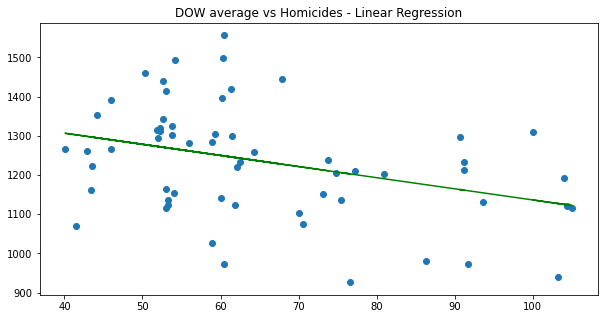

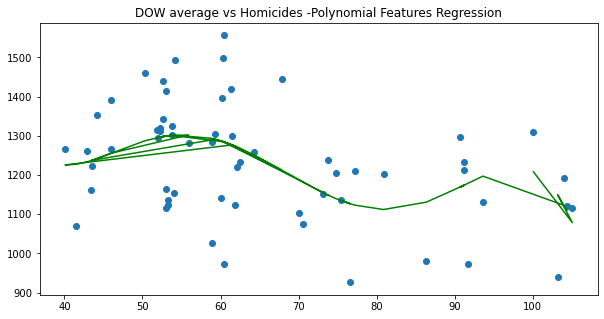

In [13]:
# Feature is daily closing price and now month
dow_grouped_1 = dow_grouped[(dow_grouped['month'] < 4) | (dow_grouped['month'] >= 12)]
X1 = np.array(dow_grouped_1['close']).reshape(-1, 1)

# Labels are number of homicides
homicide_date_counts_1 = homicide_date_counts[(homicide_date_counts['month'] < 4) | (homicide_date_counts['month'] >= 12)]
y1 = np.array(homicide_date_counts_1['homicides']).reshape(-1, 1)

# Split the data into training and testing samples
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=1)


reg = LinearRegression().fit(X1_train, y1_train)


print(reg.score(X1_test, y1_test))

model = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', LinearRegression(fit_intercept=False))])

model = model.fit(X1_train, y1_train)
model.named_steps['linear'].coef_
print(model.score(X1_test, y1_test))

plt.scatter(dow_grouped_1['close'], homicide_date_counts_1['homicides'])
plt.title('DOW average vs Homicides - Linear Regression')
plt.plot(X1, reg.predict(X1), color = "Green")
plt.show()

plt.scatter(dow_grouped_1['close'], homicide_date_counts_1['homicides'])
plt.title('DOW average vs Homicides -Polynomial Features Regression')
plt.plot(X1, model.predict(X1), color = "Green")
plt.show()

### Summer Months

0.18966901625159482
0.27645141896715275


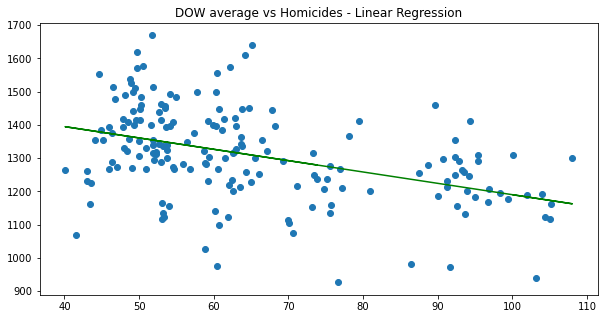

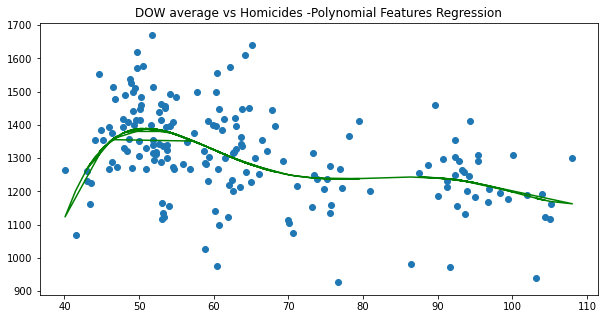

In [14]:
# Feature is daily closing price and now month
dow_grouped_2 = dow_grouped[(dow_grouped['month'] < 9) | (dow_grouped['month'] >= 6)]
X2 = np.array(dow_grouped_2['close']).reshape(-1, 1)

# Labels are number of homicides
homicide_date_counts_2 = homicide_date_counts[(homicide_date_counts['month'] < 9) | (homicide_date_counts['month'] >= 6)]
y2 = np.array(homicide_date_counts_2['homicides']).reshape(-1, 1)

# Split the data into training and testing samples
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=1)


reg = LinearRegression().fit(X2_train, y2_train)


print(reg.score(X2_test, y2_test))

model = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', LinearRegression(fit_intercept=False))])

model = model.fit(X2_train, y2_train)
model.named_steps['linear'].coef_
print(model.score(X2_test, y2_test))

plt.scatter(dow_grouped_2['close'], homicide_date_counts_2['homicides'])
plt.title('DOW average vs Homicides - Linear Regression')
plt.plot(X2, reg.predict(X2), color = "Green")
plt.show()

plt.scatter(dow_grouped_2['close'], homicide_date_counts_2['homicides'])
plt.title('DOW average vs Homicides -Polynomial Features Regression')
plt.plot(X2, model.predict(X2), color = "Green")
plt.show()

##### Unfortunately still not great results, especially in the winter months where our score decreased quite a lot.

# Discussion

### Interpreting the result

From the regressions we ran, we were unable to find a linear model that could achieve a good enough correlation coefficent for our standards. We believe that this is due to the high variation in stock prices, as we can see a fairly clear downwards trend for the data, and in general as stock prices went up homicides decreased, but the variability in homicides was too great for a linear or polynomial features model to explain.

Our first attempt at a model was a very simple 2D linear regression to try to get a sense for our data, where we mapped our dependent variable as the average stock price for a day and the explanatory variable would be the number of homicids on that day. We got a correlation coefficient of .1897 for our generic linear model, and for a polynomial features model we got .2161.

The plot for the two regression models above showed a decent downard trend, with high variabilty above and below the regression line. We also noticed that when you plotted the date as color on the graph, almost all of the summer months had higher numbers of homicides. We decided to add the month of year to our explanatory variable X to try to reduce confounding variables, but again we were unable to attain a useful model, with our score only being .29.

Finally, we decided to try splitting the data into summer and winter months, since we know for a fact that higher temperature is already correlated with increased homicide rates, so to reduce the cyclic variabilty we could make two different models from only summer months and only winter months. Unfortunately again, we only found a general downards trend as the variaton in homicides was too high to attain a very useful model for predictions. 

### Limitations

We believe that the largest limitation to our problem would be the relatively small number of stocks we have data for, as a greater number of stocks would more likely do a better job of explaining the overall economic trend and might account for more variability in the homicide counts and thus allow for a better model.  

### Ethics & Privacy

The ethics and privacy of this project are assured as all potentially personal information especially from the homicide data is anonymized sufficiently, and not made public.

### Conclusion

Our initial idea was to create a linear model that could relate stock prices to homicide rates in the U.S. as we knew from our background research as well as common sense that homicides could be correlated with poverty. While we were able to confirm the correlation, seeing as all of our models and the data itself showed very clear downward trend, as stock prices go up homicides go down, we were unable to find a model that was able to very accurately predict the number of homicides based on stock prices.

# Footnotes
<a name="lorenznote">^</a>1.Article denoting previous investigations done into crime and economy [Dynamic linkages between poverty, inequality, crime](https://journalofeconomicstructures.springeropen.com/articles/10.1186/s40008-020-00220-6).
